# **Understanding Effects of Climate Change**



#### **Team Details**- Team 9 from Section A of BA 780 course from Fall 2022.
#### **Group Members**- Carolina Bellani, Ojus Sindwani, Sindhura Uppalapati, Vibhas Goel, Xinyuan Xu, Yuhan Zu


###**Objective** 
Our primary goal is to understand the various 
factors driving climate change in various cities. Using analytical tools in 
python we want to further understand the trend and how these factors are
affecting it. With this information we’ll give insights on corresponding 
actions we can take to mitigate the risk of climate change on vulnerable 
populations.

### **Dataset Information**
We’re using the climate change data available on the CDP website for our 
analysis. This data was collected in partnership by CDP and ICLEI - Local Governments for Sustainability.
The link for the dataset is -

https://data.cdp.net/Governance/2020-Full-Cities-Dataset/eja6-zden

Dimensions- (869313 x 18)

We’re going to link another dataset with responses from cities about their 
work and inputs towards climate equity to cdp. The link for that dataset is-

https://data.cdp.net/Governance/2020-Cities-Disclosing-to-CDP/xxem-fkx3

Dimensions- (566 x 13)

In order to visualize geographical data and understand their locations 
better we would need co-ordinates i.e longitude and latitude. This 
information is provided in this dataset-
https://www.kaggle.com/datasets/shabou/cdp-city-location-dataset

Dimensions(1032 x 14)

### **Brief Introduction to Dataset**
The main dataset we're using for our analysis has information on various cities and the hazards they face collected by CDP, a not-for-profit charity that runs the global disclosure system for investors, companies, cities, states and regions to manage their environmental impact.

Our project focuses on the most recent data collected by CDP through its 2020 questionnaire for cities. The 2020 questionnaire requests general city information as well as specific environmental data in 11 categories: Governance and Data Management, Climate Hazards and Vulnerability, Adaptation, City-wide Emissions, Emissions Reduction, Opportunities, Energy, Transportation, Food, Waste, and Water Security. CDP's dataset of public responses to its 2020 questionnaire contains 869,313 rows of distinct responses by cities to the questionnaire's questions. Since the dataset is very extensive we will only be covering a few categories for the purpose of this project.

Explaining relevant columns of the dataset-

**Country**- Name of the country that the information is about.

**Parent Section**- One of the 11 categories mentioned above. We'll be covering Climate Hazards and Vulnerability, Adaption, City-wide Emissions and Emissions Reduction.

**Question Number**-In order to collect relevant information in the category the CDP asks specific questions which gives us relevant insights.
Each question has a question Number that is given by this column.

**Column**-The answers provided by cities are divided into various parts. This column tells us the subpart of the answer. For the same question Coulm number, Column name can have a different value based on the part of the question they answer

**Response Answer**-The specific subpart of the answer to the question. Response answer would have different values for same question depending on the column number/column name which it pertains to

***NOTE***- *Due to the complex nature of the dataset we had to do a lot of self joins to get meaningful visualizations. Hence, the code to aggregate the data could look a bit complicated*





In [68]:
#importing all the relevant libraries with appropriate aliases
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns
import pylab
from matplotlib import pyplot
import matplotlib as mat

from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.io import output_notebook
import seaborn as sns
from bokeh.palettes import RdBu8
from bokeh.transform import linear_cmap
from bokeh.palettes import Category10_5
from bokeh.models import BoxAnnotation
import missingno as msno

### **Pre-work**
Loading dataset and relevant libraries.

In [1]:
#installing geopandas for visualizing a world map
!pip install geopandas -q
#- q makes sure we don't print any statements in output

     |████████████████████████████████| 1.1 MB 11.3 MB/s 
     |████████████████████████████████| 16.6 MB 73 kB/s 
     |████████████████████████████████| 7.8 MB 43.6 MB/s 


In [2]:
pip install mapclassify -q

In [3]:
!pip install pycountry_convert -q

     |████████████████████████████████| 10.1 MB 30.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 316 kB 46.3 MB/s 
     |████████████████████████████████| 214 kB 45.8 MB/s 
     |████████████████████████████████| 298 kB 31.6 MB/s 
     |████████████████████████████████| 297 kB 11.8 MB/s 
     |████████████████████████████████| 297 kB 6.6 MB/s 
     |████████████████████████████████| 297 kB 61.0 MB/s 
     |████████████████████████████████| 296 kB 8.9 MB/s 
     |████████████████████████████████| 296 kB 16.3 MB/s 
     |████████████████████████████████| 280 kB 50.1 MB/s 
     |████████████████████████████████| 280 kB 52.7 MB/s 
     |████████████████████████████████| 280 kB 53.0 MB/s 
     |████████████████████████████████| 280 kB 33.5 MB/s 
     |████████████████████████████████| 279 kB 7.6 MB/s 
     |████████████████████████████████| 279 kB 50.2 MB/s 
     |

In [5]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown'
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'
    return (cn_a2_code, cn_continent)

In [6]:
#mounting the google drive to access the data from our drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
#reading our datasets into corresponding pandas dataframes
ques_df = pd.read_csv("/content/gdrive/Shareddrives/BA780_A9_Share/2020_Full_Cities_Dataset.csv")
cities_df = pd.read_csv("https://raw.githubusercontent.com/SindhuraUppalapati/Climate-Change/main/2020_Cities_Disclosing_to_CDP.csv")
city_coords = pd.read_csv("https://raw.githubusercontent.com/SindhuraUppalapati/Climate-Change/main/CDP%20-%20City%20Location.csv", encoding= 'unicode_escape')


In [8]:
ques_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869313 entries, 0 to 869312
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Questionnaire         869313 non-null  object
 1   Year Reported to CDP  869313 non-null  int64 
 2   Account Number        869313 non-null  int64 
 3   Organization          869313 non-null  object
 4   Country               869313 non-null  object
 5   CDP Region            869313 non-null  object
 6   Parent Section        663968 non-null  object
 7   Section               869313 non-null  object
 8   Question Number       869313 non-null  object
 9   Question Name         869313 non-null  object
 10  Column Number         869313 non-null  int64 
 11  Column Name           840594 non-null  object
 12  Row Number            869313 non-null  int64 
 13  Row Name              404832 non-null  object
 14  Response Answer       703025 non-null  object
 15  Comments         

In [9]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year Reported to CDP  566 non-null    int64  
 1   Account Number        566 non-null    int64  
 2   Organization          566 non-null    object 
 3   City                  447 non-null    object 
 4   Country               566 non-null    object 
 5   CDP Region            566 non-null    object 
 6   Reporting Authority   566 non-null    object 
 7   Access                566 non-null    object 
 8   First Time Discloser  566 non-null    object 
 9   Population            565 non-null    float64
 10  Population Year       566 non-null    int64  
 11  City Location         409 non-null    object 
 12  Last update           566 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 57.6+ KB


In [10]:
city_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1032 non-null   int64  
 1   Account.Number        1032 non-null   int64  
 2   Organization          1032 non-null   object 
 3   City                  751 non-null    object 
 4   City.Location         688 non-null    object 
 5   Country               1032 non-null   object 
 6   CDP.Region            1032 non-null   object 
 7   Country.Name          1032 non-null   object 
 8   Country.Code.2        1030 non-null   object 
 9   Country.Code.3        1032 non-null   object 
 10  Country.Numeric.code  1032 non-null   int64  
 11  lat                   1019 non-null   float64
 12  long                  1019 non-null   float64
 13  Location.Source       1019 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 113.0+ KB


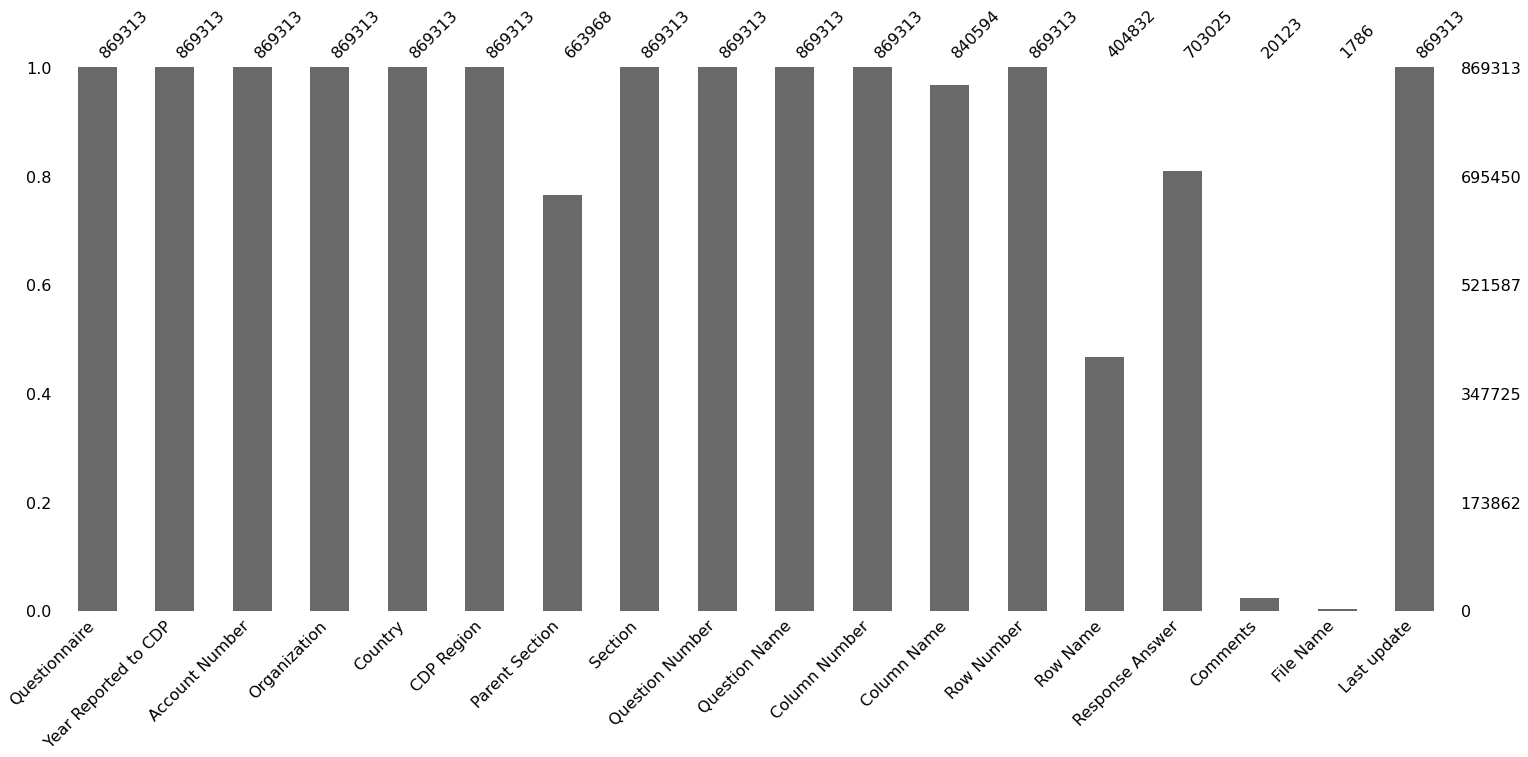

In [140]:
msno.bar(ques_df)

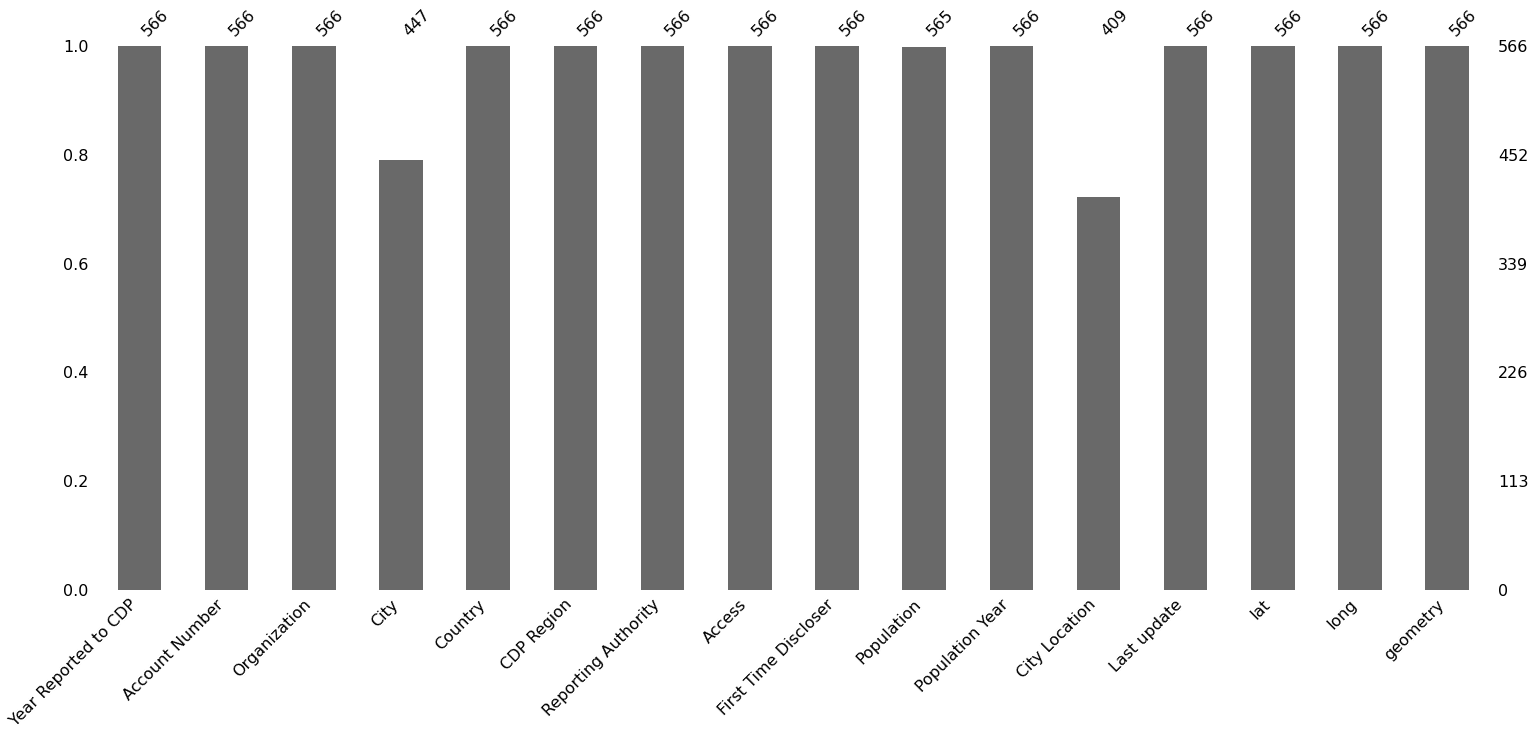

In [139]:
msno.bar(cities_df)

We can several columns of the questionnaire are missing values which is the common problem faced by survey based data. All these responses are based on very specific questions and attributes which are articulate. Filling these null values with any of the imputation techniques would not add any value and hence we would be using them as such.

### **1. Data Preprocessing**
In this segment we do the necessary cleaning and modify the data in a way that makes it easier to visualize.

#### **1.1 Climate hazards**

In the first step we're performing a self join to get information about the climate hazards faced by various countries. Question 2.1 combined with various column numbers would give us more insights into it



*Question 2.1: Please list the most significant climate hazards faced by your city and indicate the probability and consequence of these hazards, as well as the expected future change in frequency and intensity. Please also select the most relevant assets or services that are affected by the climate hazard and provide a description of the impact* 



In [11]:
hazards_df_missing = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.1"),
                       
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"]).copy()

hazards_df_missing[hazards_df_missing['Response Answer'].isna()]                      
#hazards_df_missing.loc[hazards_df_missing("Response Answer").isna()]

,Account Number,Organization,Country,CDP Region,Year Reported to CDP,Row Number,Response Answer
118800,1499,Ajuntament de Barcelona,Spain,Europe,2020,2,NaN
324639,1499,Ajuntament de Barcelona,Spain,Europe,2020,3,NaN
742650,1499,Ajuntament de Barcelona,Spain,Europe,2020,3,NaN
141013,1499,Ajuntament de Barcelona,Spain,Europe,2020,4,NaN
650991,1499,Ajuntament de Barcelona,Spain,Europe,2020,4,NaN
...,...,...,...,...,...,...,...
496876,848138,Prefeitura de Conde (Paraíba),Brazil,Latin America,2020,0,NaN
652383,848138,Prefeitura de Conde (Paraíba),Brazil,Latin America,2020,0,NaN
672130,848138,Prefeitura de Conde (Paraíba),Brazil,Latin America,2020,0,NaN
752154,848138,Prefeitura de Conde (Paraíba),Brazil,Latin America,2020,0,NaN


As we want to look into the cities which respond to the Question 2.1 in some way we would move on to put a filter where "Response answer" is not NA. This way we would get records only for the cities which have responded to that question. We would also be looking at column numbers which are specific to the answers which convey the most meaning.

For this question we have selected:
1. Column 1: Climate Hazards (tells us the climate hazards)
2. Column 7: Please identify which vulnerable populations are affected


In [12]:
hazards_df = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.1") &
                       (ques_df["Column Number"] == 1) &
                       (~ques_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"]).copy()

# Rename the columns
hazards_df.rename(columns={"Year Reported to CDP": "Year", "Response Answer": "Hazard"}, inplace=True)



,Account Number,Organization,Country,CDP Region,Year,Row Number,Hazard
522383,1184,City of Austin,United States of America,North America,2020,1,Water Scarcity > Drought
122958,1184,City of Austin,United States of America,North America,2020,2,Flood and sea level rise > Flash / surface flood
613736,1184,City of Austin,United States of America,North America,2020,3,Extreme hot temperature > Extreme hot days
868679,1184,City of Austin,United States of America,North America,2020,4,Wild fire > Forest fire
83099,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Extreme hot temperature > Heat wave
...,...,...,...,...,...,...,...
84990,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,1,Storm and wind > Tropical storm
72047,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,2,Water Scarcity > Drought
707125,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,3,Flood and sea level rise > Flash / surface flood
648539,848478,Banyuwangi City,Indonesia,Southeast Asia and Oceania,2020,1,Water Scarcity > Drought


#### **1.2 Vulnerable Populations**
In this section we're extracting information about vulnerable populations. Question Number 2.1 combined with column 7 of our questions dataset gives us this information about the Vulnerable Populations.

In [13]:
# Extract the vulnerable population data from the survey
vulnerable_population_data = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                 (ques_df["Question Number"] == "2.1") &
                 (ques_df["Column Number"] == 7),
                 ["Account Number", "Row Number", "Response Answer"]].copy()

# Simplify all "Other..." responses to "Other"
vulnerable_population_data.loc[(~vulnerable_population_data["Response Answer"].isna()) &
               (vulnerable_population_data["Response Answer"].str.startswith("Other")),
               "Response Answer"] = "Other"

vulnerable_population_data.head()

,Account Number,Row Number,Response Answer
206,73725,1,Other
229,840244,1,Elderly
245,32550,4,Marginalized groups
283,31108,5,Elderly
342,1850,3,Persons living in sub-standard housing


We used one hot encoding to encode the categories of the vulnerable population column so that we can visualize this data more clearly and ease our future steps.

In [14]:
# Dummy the new column
vulnerable_population_data = pd.get_dummies(vulnerable_population_data, columns=["Response Answer"], prefix="", prefix_sep="")

# Aggregate the data for each distinct hazard
vulnerable_population_data = vulnerable_population_data.groupby(["Account Number", "Row Number"]).sum()

# Add a column for the total number of VPs affected
vulnerable_population_data["Total VP Categories Affected"] = vulnerable_population_data.sum(axis=1)

vulnerable_population_data.head()

Children & youth  Elderly  Indigenous population  \
Account Number Row Number                                                     
1184           1                          0        0                      0   
               2                          0        0                      0   
               3                          0        1                      0   
               4                          1        1                      0   
1499           1                          1        1                      0   

                           Low-income households  Marginalized groups  Other  \
Account Number Row Number                                                      
1184           1                               1                    1      0   
               2                               1                    1      0   
               3                               1                    1      0   
               4                               1                    1      0   
1499           1                               1                    0      0   

                           Persons living in sub-standard housing  \
Account Number Row Number                                           
1184           1                                                1   
               2                                                1   
               3                                                1   
               4                                                1   
1499           1                                                1   

                           Persons with chronic diseases  \
Account Number Row Number                                  
1184           1                                       0   
               2                                       0   
               3                                       1   
               4                                       1   
1499           1                                       1   

                           Persons with disabilities  Unemployed persons  \
Account Number Row Number                                                  
1184           1                                   0                   0   
               2                                   1                   1   
               3                                   1                   1   
               4                                   1                   0   
1499           1                                   0                   0   

                           Women & girls  Total VP Categories Affected  
Account Number Row Number                                               
1184           1                       0                             3  
               2                       0                             5  
               3                       0                             7  
               4                       0                             7  
1499           1                       1                             6

In [15]:
vulnerable_population_data.shape

(2832, 12)

In [110]:
# Merge the data into the df
hazards_df = pd.merge(hazards_df, vulnerable_population_data, how="left", on=["Account Number", "Row Number"])

# Clean up the column names
hazards_df.rename(columns={"Row Number": "Hazard Number", "Hazard": "Hazard Type"}, inplace=True)

print(hazards_df.shape)
hazards_df.head()

(2703, 19)


,Account Number,Organization,Country,CDP Region,Year,Hazard Number,Hazard Type,Children & youth,Elderly,Indigenous population,Low-income households,Marginalized groups,Other,Persons living in sub-standard housing,Persons with chronic diseases,Persons with disabilities,Unemployed persons,Women & girls,Total VP Categories Affected
0,1184,City of Austin,United States of America,North America,2020,1,Water Scarcity > Drought,0,0,0,1,1,0,1,0,0,0,0,3
1,1184,City of Austin,United States of America,North America,2020,2,Flood and sea level rise > Flash / surface flood,0,0,0,1,1,0,1,0,1,1,0,5
2,1184,City of Austin,United States of America,North America,2020,3,Extreme hot temperature > Extreme hot days,0,1,0,1,1,0,1,1,1,1,0,7
3,1184,City of Austin,United States of America,North America,2020,4,Wild fire > Forest fire,1,1,0,1,1,0,1,1,1,0,0,7
4,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Extreme hot temperature > Heat wave,1,1,0,1,0,0,1,1,0,0,1,6


#### **1.3 Factors challenging Climate Hazards**
In this section we're trying to analyze the various hazards challenging the climate adaptability of various countries. Question 2.2 Column 1 of our questions dataset gives us the information of the factors. Column 2 gives us information about the challenges.

We then merged these two dataframes to get meaningful results to study the factors challenging the countries.


*Question 2.2 Please identify and describe the factors that most greatly affect your city’s ability to adapt to climate change and indicate how those factors either support or challenge this ability.*




In [17]:
factors_missing = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.2"),
                       
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"]).copy()

factors_missing[factors_missing['Response Answer'].isna()] 

,Account Number,Organization,Country,CDP Region,Year Reported to CDP,Row Number,Response Answer
683542,1184,City of Austin,United States of America,North America,2020,1,NaN
165802,1184,City of Austin,United States of America,North America,2020,2,NaN
62363,1184,City of Austin,United States of America,North America,2020,3,NaN
493144,1184,City of Austin,United States of America,North America,2020,4,NaN
426693,1184,City of Austin,United States of America,North America,2020,5,NaN
...,...,...,...,...,...,...,...
764246,848404,Mongui,Colombia,Latin America,2020,1,NaN
66726,848409,Lince,Peru,Latin America,2020,0,NaN
279041,848409,Lince,Peru,Latin America,2020,0,NaN
550225,848409,Lince,Peru,Latin America,2020,0,NaN


As we can see that there are severeal cities which have not responded to the Question 2.2. We would move on to put a filter where "Response answer" is not NA. This way we would get records only for the cities which have responded to that question. We would also be looking at column numbers which are specific to the answers which convey the most meaning.

For this question we have selected:
1. Column 1: Factors that affect ability to adapt
2. Column 2: Indicate if this factor either supports or challenges the ability to adapt
3. Column 3: Level of degree to which factor challenges/supports the adaptive capacity of your city


In [18]:
country_adaptability_factors = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                   (ques_df["Question Number"] == "2.2") &
                       (ques_df["Column Number"] ==1) &
                       (ques_df["Response Answer"]!="Question not applicable")&
                       (~ques_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

# Extract the data from the survey
challenges = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.2") &
                       (ques_df["Column Number"] ==2) &
                       (ques_df["Response Answer"]!="Question not applicable")&
                        (ques_df["Response Answer"]=="Challenges")&
                       (~ques_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

degree_of_challenge = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.2") &
                       (ques_df["Column Number"] ==3) &
                       #(ques_df["Response Answer"]!="Question not applicable")&
                        
                       (~ques_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])    

supports = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.2") &
                       (ques_df["Column Number"] ==2) &
                       (ques_df["Response Answer"]!="Question not applicable")&
                        (ques_df["Response Answer"]=="Supports")&
                       (~ques_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

degree_of_support = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "2.2") &
                       (ques_df["Column Number"] ==3) &
                       #(ques_df["Response Answer"]!="Question not applicable")&
                        
                       (~ques_df["Response Answer"].isna()),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])                       

# Merge the data into the df
country_adaptability_challenging_factors = country_adaptability_factors.merge(challenges, how="inner", on=["Account Number", "Row Number"])


#renaming few relevant columns names
country_adaptability_challenging_factors.rename(columns={'Response Answer_x': 'Factor Challenging', 'Country_x': 'Countries'}, inplace=True)


country_adaptability_challenging_factors_degree = country_adaptability_challenging_factors.merge(degree_of_challenge, how="inner", on=["Account Number", "Row Number"])

#renaming few relevant columns names
country_adaptability_challenging_factors_degree.rename(columns={'Response Answer_x': 'Factor Challenging', 'Country_x': 'Countries'}, inplace=True)

# Merge the data into the df
country_adaptability_supports_factors = country_adaptability_factors.merge(supports, how="inner", on=["Account Number", "Row Number"])

#renaming few relevant columns names
country_adaptability_supports_factors.rename(columns={'Response Answer_x': 'Factor Supporting', 'Country_x': 'Countries'}, inplace=True)


country_adaptability_supports_factors_degree = country_adaptability_supports_factors.merge(degree_of_support, how="inner", on=["Account Number", "Row Number"])

#renaming few relevant columns names
country_adaptability_supports_factors_degree.rename(columns={'Response Answer_x': 'Factor Supporting', 'Country_x': 'Countries'}, inplace=True)

In [19]:
country_adaptability_challenging_factors.head(3)


,Account Number,Organization_x,Countries,CDP Region_x,Year Reported to CDP_x,Row Number,Factor Challenging,Organization_y,Country_y,CDP Region_y,Year Reported to CDP_y,Response Answer_y
0,1184,City of Austin,United States of America,North America,2020,1,Public health,City of Austin,United States of America,North America,2020,Challenges
1,1184,City of Austin,United States of America,North America,2020,2,Poverty,City of Austin,United States of America,North America,2020,Challenges
2,1184,City of Austin,United States of America,North America,2020,3,Infrastructure conditions / maintenance,City of Austin,United States of America,North America,2020,Challenges


In [20]:
country_adaptability_challenging_factors_degree.head(3)

,Account Number,Organization_x,Countries,CDP Region_x,Year Reported to CDP_x,Row Number,Factor Challenging,Organization_y,Country_y,CDP Region_y,Year Reported to CDP_y,Response Answer_y,Organization,Country,CDP Region,Year Reported to CDP,Response Answer
0,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,1,Housing,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Challenges,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Significantly challenges
1,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,2,Public health,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Challenges,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Significantly challenges
2,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,3,Poverty,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Challenges,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Moderately challenges


In [21]:
country_adaptability_supports_factors.head(3)

,Account Number,Organization_x,Countries,CDP Region_x,Year Reported to CDP_x,Row Number,Factor Supporting,Organization_y,Country_y,CDP Region_y,Year Reported to CDP_y,Response Answer_y
0,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Access to basic services,Ajuntament de Barcelona,Spain,Europe,2020,Supports
1,1499,Ajuntament de Barcelona,Spain,Europe,2020,2,Access to healthcare,Ajuntament de Barcelona,Spain,Europe,2020,Supports
2,1499,Ajuntament de Barcelona,Spain,Europe,2020,3,Access to education,Ajuntament de Barcelona,Spain,Europe,2020,Supports


In [22]:
country_adaptability_supports_factors_degree.head(3)

,Account Number,Organization_x,Countries,CDP Region_x,Year Reported to CDP_x,Row Number,Factor Supporting,Organization_y,Country_y,CDP Region_y,Year Reported to CDP_y,Response Answer_y,Organization,Country,CDP Region,Year Reported to CDP,Response Answer
0,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Access to basic services,Ajuntament de Barcelona,Spain,Europe,2020,Supports,Ajuntament de Barcelona,Spain,Europe,2020,Moderately supports
1,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,1,"Other, please specify: Adaptation Planning",Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Supports,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Significantly supports
2,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,2,Access to quality / relevant data,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Supports,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Moderately supports


In [23]:

#Assigning different weights according to degree of challenge
country_adaptability_challenging_factors_degree['Response Answer'] = country_adaptability_challenging_factors_degree['Response Answer'].replace(['Significantly challenges', 'Moderately challenges', 'Somewhat challenges'], [3, 2, 1])
country_adaptability_challenging_factors_degree['Response Answer']=country_adaptability_challenging_factors_degree['Response Answer'].astype(int)
country_adaptability_challenging_factors_degree.head(3)

,Account Number,Organization_x,Countries,CDP Region_x,Year Reported to CDP_x,Row Number,Factor Challenging,Organization_y,Country_y,CDP Region_y,Year Reported to CDP_y,Response Answer_y,Organization,Country,CDP Region,Year Reported to CDP,Response Answer
0,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,1,Housing,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Challenges,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,3
1,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,2,Public health,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Challenges,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,3
2,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,3,Poverty,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Challenges,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,2


In [24]:

#Assigning different weights according to degree of support
country_adaptability_supports_factors_degree['Response Answer'] = country_adaptability_supports_factors_degree['Response Answer'].replace(['Significantly supports', 'Moderately supports', 'Somewhat supports'], [3, 2, 1])
country_adaptability_supports_factors_degree['Response Answer']=country_adaptability_supports_factors_degree['Response Answer'].astype(int)
country_adaptability_supports_factors_degree.head(3)

,Account Number,Organization_x,Countries,CDP Region_x,Year Reported to CDP_x,Row Number,Factor Supporting,Organization_y,Country_y,CDP Region_y,Year Reported to CDP_y,Response Answer_y,Organization,Country,CDP Region,Year Reported to CDP,Response Answer
0,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Access to basic services,Ajuntament de Barcelona,Spain,Europe,2020,Supports,Ajuntament de Barcelona,Spain,Europe,2020,2
1,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,1,"Other, please specify: Adaptation Planning",Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Supports,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,3
2,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,2,Access to quality / relevant data,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,Supports,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,2020,2


To understand how significantly various factors would impact the cities ability to react to climate change we have assigned weights according to the degree of impact. After this we would sum up these weights in order to see what factors could be having higher weightage.

In [25]:
#Merging and grouping by to calculate weights 
top_10_factors_challenging_weights=pd.DataFrame(country_adaptability_challenging_factors_degree.groupby('Factor Challenging')['Response Answer'].sum().sort_values(ascending=False)).head(10)
top_10_factors_challenging_weights.rename(columns={'Response Answer': 'Weights of Factor'}, inplace=True)
top_10_factors_challenging_weights

,Weights of Factor
Factor Challenging,
Budgetary capacity,230
Housing,187
Poverty,166
Rapid urbanization,145
Infrastructure conditions / maintenance,131
Inequality,125
Environmental conditions,123
Land use planning,110
Resource availability,103


In [26]:
top_10_factors_supporting_weights=pd.DataFrame(country_adaptability_supports_factors_degree.groupby('Factor Supporting')['Response Answer'].sum().sort_values(ascending=False)).head(10)
top_10_factors_supporting_weights.rename(columns={'Response Answer': 'Weights of Factor'}, inplace=True)
top_10_factors_supporting_weights

,Weights of Factor
Factor Supporting,
Community engagement,180
Land use planning,131
Government capacity,115
Political stability,111
Access to education,110
Political engagement / transparency,100
Access to basic services,89
Access to healthcare,84
Environmental conditions,73


#### **1.4 CO2 Emissions**
Next we study the CO2 emissions emitted by different sectors in various countries. This information is available in Question Number 4.6a and Column 1 of our dataset.

Question 4.6a: Please provide a breakdown of your city-wide emissions by sector and sub-sector in the table below. Where emissions data is not available, please use the relevant notation keys to explain the reason why.

Column 1: Direct emissions (metric tonnes CO2e)

In order to study this further, we find the total emissions of CO2 grouped by each sector. This helps us find out which sectors contribute the most to CO2 emissions.

In [27]:
#create subset where Question # is 4.6 and Column Number is 1
emissions_df=ques_df
sector = emissions_df[(emissions_df['Question Number'] == '4.6a')][(emissions_df['Column Number'] == 1)]
sector = sector.loc[sector["Response Answer"] != 'Question not applicable']
sector['Response Answer']=sector['Response Answer'].dropna().astype('float64',errors='ignore').copy();

#order top sectors in descending order
top_sectors_emissions = sector.groupby(["Row Name"])['Response Answer'].sum().sort_values(ascending=False).reset_index();
top_sectors_emissions.head(10)

<ipython-input-27-4be7bd48365f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sector = emissions_df[(emissions_df['Question Number'] == '4.6a')][(emissions_df['Column Number'] == 1)]


,Row Name,Response Answer
0,Total Emissions (excluding generation of grid-...,7.607447e+08
1,Transportation > On-road,6.814705e+08
2,Total Stationary Energy,4.037771e+08
3,Total Transport,3.797560e+08
4,Stationary energy > Industrial buildings & fac...,1.970945e+08
5,Total Generation of grid-supplied energy,1.499571e+08
6,Stationary energy > Residential buildings,1.227297e+08
7,Total IPPU,1.084874e+08
8,Stationary energy > Commercial buildings & fac...,1.018252e+08
9,Generation of grid-supplied energy > Electrici...,9.407945e+07


In [28]:
top_countries = sector.groupby(["CDP Region","Country"])['Response Answer'].sum().sort_values(ascending=False).reset_index()
top_countries2=top_countries.copy()
top_countries2.Country[top_countries["Country"]=="Taiwan, Greater China"] = "China"
top_countries.Country[top_countries["Country"]=="Taiwan, Greater China"] = "China"
top_countries2

<ipython-input-28-cdd3fc52b467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries2.Country[top_countries["Country"]=="Taiwan, Greater China"] = "China"
<ipython-input-28-cdd3fc52b467>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.Country[top_countries["Country"]=="Taiwan, Greater China"] = "China"


,CDP Region,Country,Response Answer
0,North America,United States of America,8.777106e+08
1,Latin America,Mexico,4.317805e+08
2,East Asia,Republic of Korea,3.147796e+08
3,Europe,United Kingdom of Great Britain and Northern I...,2.044079e+08
4,North America,Canada,1.752119e+08
5,East Asia,China,1.667857e+08
6,Middle East,United Arab Emirates,1.240881e+08
7,Europe,Russian Federation,1.240535e+08
8,Europe,Turkey,1.149874e+08
9,Latin America,Brazil,8.306847e+07


In [29]:
#function to get longitude and latitude data from country name

from geopy.geocoders import Nominatim
geolocator = Nominatim()

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (0,0)

/usr/local/lib/python3.8/dist-packages/geopy/geocoders/osm.py:132: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  warnings.warn(


In [30]:
countries_with_latlong=pd.DataFrame()
index=list('AB')

for i in top_countries['Country']:
  g=geolocate(i)
  #print(g[0],g[1])
  #df2.append(pd.Series(g[0])[0])
  df3=pd.DataFrame({'Country':i,'Latitude':[g[0]],'Longitude':[g[1]]})
  countries_with_latlong=countries_with_latlong.append(df3)
    


In [31]:
countries_with_latlong.head(3)

,Country,Latitude,Longitude
0,United States of America,39.783730,-100.445882
0,Mexico,23.658512,-102.007710
0,Republic of Korea,36.638392,127.696119


In [32]:
#Merging our dataset to get longitude-latitude values
top_countries=top_countries.merge(countries_with_latlong,on='Country')
top_countries.head(3)

,CDP Region,Country,Response Answer,Latitude,Longitude
0,North America,United States of America,8.777106e+08,39.783730,-100.445882
1,Latin America,Mexico,4.317805e+08,23.658512,-102.007710
2,East Asia,Republic of Korea,3.147796e+08,36.638392,127.696119


In [33]:
top_regions=top_countries.groupby(["CDP Region","Latitude", "Longitude"])['Response Answer'].sum().sort_values(ascending=False).reset_index()
top_regions.head()

,CDP Region,Latitude,Longitude,Response Answer
0,North America,39.783730,-100.445882,8.777106e+08
1,Latin America,23.658512,-102.007710,4.317805e+08
2,East Asia,36.638392,127.696119,3.147796e+08
3,Europe,54.702354,-3.276575,2.044079e+08
4,North America,61.066692,-107.991707,1.752119e+08


In [34]:
#converting top countries pandas df to a geopandas df
from geopandas import GeoDataFrame

top_countries = GeoDataFrame(top_countries)

In [35]:
#Adding alpha code for all countries so as to plot them on a map
import pycountry
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=country_name_to_country_alpha3(country)
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code
top_countries['CODE']=alpha3code(top_countries['Country'])
top_countries

,CDP Region,Country,Response Answer,Latitude,Longitude,CODE
0,North America,United States of America,8.777106e+08,39.783730,-100.445882,USA
1,Latin America,Mexico,4.317805e+08,23.658512,-102.007710,MEX
2,East Asia,Republic of Korea,3.147796e+08,36.638392,127.696119,None
3,Europe,United Kingdom of Great Britain and Northern I...,2.044079e+08,54.702354,-3.276575,GBR
4,North America,Canada,1.752119e+08,61.066692,-107.991707,CAN
5,East Asia,China,1.667857e+08,35.000074,104.999927,CHN
6,Middle East,United Arab Emirates,1.240881e+08,24.000249,53.999483,ARE
7,Europe,Russian Federation,1.240535e+08,64.686314,97.745306,RUS
8,Europe,Turkey,1.149874e+08,38.959759,34.924965,TUR
9,Latin America,Brazil,8.306847e+07,-10.333333,-53.200000,BRA


### **1.5 Actions Taken by Cities to counter Hazards**

Next we study the actions taken by various cities to counter the hazrads. For this puprose we would use the Question 3.

Question 3: Please describe the main actions you are taking to reduce the risk to, and vulnerability of, your city’s infrastructure, services, citizens, and businesses from climate change as identified in the Climate Hazards section.





In [36]:
actions_df_missing = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "3.0") & 
                       (ques_df["Column Number"] == 2), 
                       #(~city["Response Answer"].isna())
                       #(city["Response Answer"] != "No action currently taken"),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

# Simplify all "Other..." responses to "Other"
#actions_df.loc[(~actions_df["Response Answer"].isna()) &
 #              (actions_df["Response Answer"].str.startswith("Other")),
  #             "Response Answer"] = "Other"



actions_df_missing[actions_df_missing['Response Answer'].isna()]     

,Account Number,Organization,Country,CDP Region,Year Reported to CDP,Row Number,Response Answer
405137,31117,City of Toronto,Canada,North America,2020,16,NaN
192110,31157,City of Delhi,India,South and West Asia,2020,0,NaN
860,35862,City of Detroit,United States of America,North America,2020,3,NaN
450843,35863,eThekwini Municipality,South Africa,Africa,2020,2,NaN
731775,35884,City of San Diego,United States of America,North America,2020,0,NaN
...,...,...,...,...,...,...,...
765402,841003,Ayuntamiento de Apodaca,Mexico,Latin America,2020,0,NaN
587469,842160,Balikesir Metropolitan Municipality,Turkey,Europe,2020,0,NaN
459712,845309,Puente Piedra,Peru,Latin America,2020,0,NaN
792915,847922,Junta Municipal de Medio Ambiente Lagunas (JIMAL),Mexico,Latin America,2020,0,NaN


As we can see that there are severeal cities which have not responded to the Question 3. We would move on to put a filter where "Response answer" is not NA. This way we would get records only for the cities which have responded to that question. We would also be looking at column numbers which are specific to the answers which convey the most meaning.

For this question we have selected:

Column 2: Action Taken (Actions taken by cities to mitigate hazards)

In [37]:
actions_df = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                       (ques_df["Question Number"] == "3.0") & 
                       (ques_df["Column Number"] == 2) &
                       (~ques_df["Response Answer"].isna())&
                       (ques_df["Response Answer"] != "No action currently taken"),
                       ["Account Number", "Organization", "Country", "CDP Region", "Year Reported to CDP", "Row Number", "Response Answer"]
                      ].sort_values(by=["Account Number", "Row Number"])

# Simplify all "Other..." responses to "Other"
actions_df.loc[(~actions_df["Response Answer"].isna()) &
               (actions_df["Response Answer"].str.startswith("Other")),
               "Response Answer"] = "Other"

actions_df.rename(columns={"Year Reported to CDP": "Year", "Response Answer": "Action"}, inplace=True)
actions_df.head(3)

,Account Number,Organization,Country,CDP Region,Year,Row Number,Action
540897,1184,City of Austin,United States of America,North America,2020,1,Flood mapping
519105,1184,City of Austin,United States of America,North America,2020,2,Community engagement/education
673800,1184,City of Austin,United States of America,North America,2020,3,Heat mapping and thermal imaging


In [38]:
# Extract the data from the survey
data = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                 (ques_df["Question Number"] == "3.0") &
                 (ques_df["Column Number"] == 1),
                 ["Account Number", "Row Number", "Response Answer"]
                ]

# Merge the data into the df
actions_df = pd.merge(actions_df, data, how="left", on=["Account Number", "Row Number"])

# Give the column a more descriptive name
actions_df.rename(columns={"Response Answer": "Hazard"}, inplace=True) 


data1 = ques_df.loc[(ques_df["Year Reported to CDP"] == 2020) &
                 (ques_df["Question Number"] == "3.0") &
                 (ques_df["Column Number"] == 6) ,
                 
                 ["Account Number", "Row Number", "Response Answer"]
                ].groupby(["Account Number", "Row Number"])["Response Answer"].count()

# Merge the data into the df
actions_df = pd.merge(actions_df, data1, how="left", on=["Account Number", "Row Number"])

# Give the column a more descriptive name
actions_df.rename(columns={"Response Answer": "Total Co-Benefit area"}, inplace=True)
actions_df.rename(columns={"Row Number": "Action Number", "Action": "Action Type", "Hazard": "Hazard Type"}, inplace=True)

actions_df

,Account Number,Organization,Country,CDP Region,Year,Action Number,Action Type,Hazard Type,Total Co-Benefit area
0,1184,City of Austin,United States of America,North America,2020,1,Flood mapping,Flood and sea level rise > Flash / surface flood,6
1,1184,City of Austin,United States of America,North America,2020,2,Community engagement/education,Wild fire > Forest fire,2
2,1184,City of Austin,United States of America,North America,2020,3,Heat mapping and thermal imaging,Extreme hot temperature > Extreme hot days,9
3,1184,City of Austin,United States of America,North America,2020,4,Diversification of water supply,Water Scarcity > Drought,9
4,1184,City of Austin,United States of America,North America,2020,5,Community engagement/education,Flood and sea level rise > Flash / surface flood,8
...,...,...,...,...,...,...,...,...,...
2624,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,3,Diversification of water supply,Water Scarcity > Drought,3
2625,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,4,Tree planting and/or creation of green space,Water Scarcity > Drought,5
2626,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,5,Community engagement/education,Flood and sea level rise > Flash / surface flood,4
2627,848478,Banyuwangi City,Indonesia,Southeast Asia and Oceania,2020,1,Other,Flood and sea level rise > Coastal flood,2


## **2. Data Visualizations**

Now we visualize the various parts of the datasets and provide our preliminary analysis.

### **2.1 Visualizing the geographical distribution of cities in our dataset**

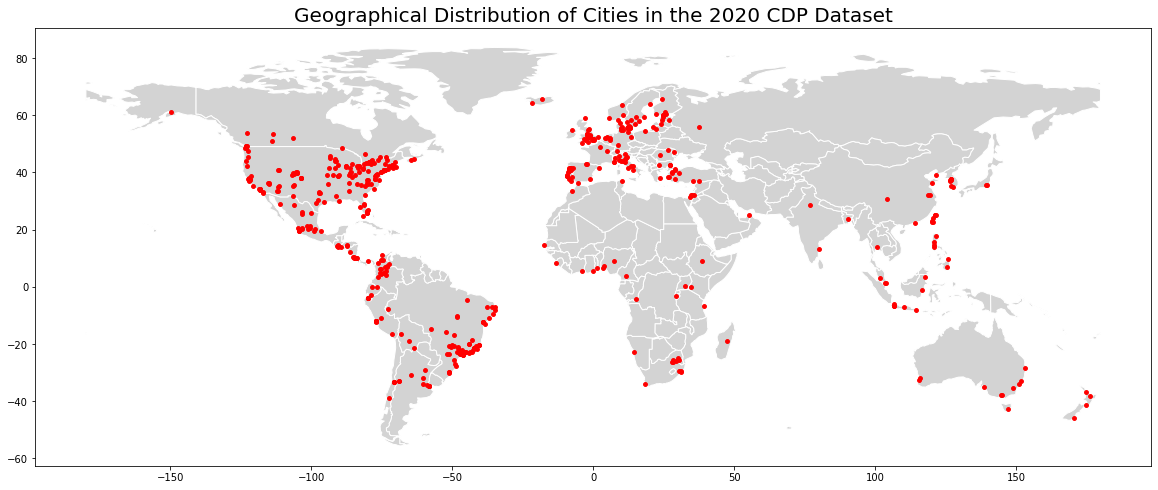

In [39]:
city_coords.rename(columns={"Account.Number":"Account Number"}, inplace=True)

#merging our dataset with the city coordinates dataset
cities_df = pd.merge(cities_df, city_coords[["Account Number","lat", "long"]])

#GeoDataFrame is a pandas.DataFrame object that has a column with geometry
cities_gdf = gpd.GeoDataFrame(cities_df, geometry=
                             gpd.points_from_xy(cities_df['long'], cities_df['lat']))

#epsg:4326 is a latitude longitude coordinate system based on earths centre of mass
cities_gdf.crs = "epsg:4326"


cities_gdf.drop(columns="City Location", inplace=True)

#loading a geopandas pre-made map that we've installed previously
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#removing the locations on map that are not inhibited by humans
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

#assigning the relevant graph parameters
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Geographical Distribution of Cities in the 2020 CDP Dataset",size=20)
ax.set_aspect('equal')

#plotting the background map
world.plot(ax=ax, color='lightgrey', edgecolor='white')

#plotting the cities in our dataset on the map
cities_gdf.plot(ax=ax, marker='o', color='red', markersize=15);


This visualization helps us visualize the geographical locations of the cities mentioned in our dataset.
This will help us understand the various climate hazards faced by countries using a geographical visuaisation later.

It is interesting to note that the questions like climatic hazards which we are trying to answer are present in some cities which havent responded to the survey conducted by CDP. for e.g. Water scarcity as a hazard is expected to be more prevalant in South African regions but lot of S.African cities havent responded to the questions posed. 

In this case we wont be imputing the values for these countries as much of this information is survey based.

### **2.2 What are the most prevalent climate hazards reported by countries**

In [40]:
most_common_hazards = hazards_df.groupby('Hazard')['Account Number'].count().sort_values(ascending=False).head(10).reset_index().copy()
most_common_hazards.head()

,Hazard,Account Number
0,Extreme Precipitation > Rain storm,287
1,Water Scarcity > Drought,262
2,Extreme hot temperature > Heat wave,247
3,Flood and sea level rise > Flash / surface flood,221
4,Extreme hot temperature > Extreme hot days,178


We wanted to see what are the most frequent hazards which affect the world as a whole.

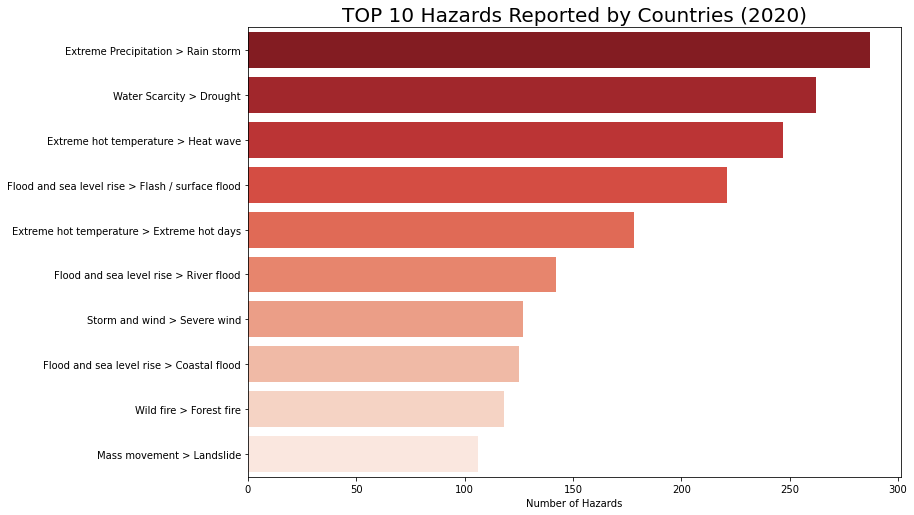

In [41]:
#horizontal bar chart
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x='Account Number', y='Hazard', data=most_common_hazards, ax=ax, palette="Reds_r")
pylab.ylabel('')
pylab.xlabel('Number of Hazards')
plt.title('TOP 10 Hazards Reported by Countries (2020)',size=20);

In [109]:
hazards_df

,Account Number,Organization,Country,CDP Region,Year,Row Number,Hazard
522383,1184,City of Austin,United States of America,North America,2020,1,Water Scarcity > Drought
122958,1184,City of Austin,United States of America,North America,2020,2,Flood and sea level rise > Flash / surface flood
613736,1184,City of Austin,United States of America,North America,2020,3,Extreme hot temperature > Extreme hot days
868679,1184,City of Austin,United States of America,North America,2020,4,Wild fire > Forest fire
83099,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,Extreme hot temperature > Heat wave
...,...,...,...,...,...,...,...
84990,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,1,Storm and wind > Tropical storm
72047,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,2,Water Scarcity > Drought
707125,848476,Municipalidad de Cañas,Costa Rica,Latin America,2020,3,Flood and sea level rise > Flash / surface flood
648539,848478,Banyuwangi City,Indonesia,Southeast Asia and Oceania,2020,1,Water Scarcity > Drought


After seeing that there are 566 countries which have responded to the questionnaire we wanted to check what are the most common climate hazards faced by them. We observed that more than 50% of the countries face Extreme Precipitation. Water scarcity and Extreme hot temperatures form the second and third most frequent hazards faced by a lot of countries.


### **2.3 Vulnerable Populations affected by Hazards**


In [42]:
# Merge the data into the df
vulnerable_population_per_hazards_df = pd.merge(hazards_df, vulnerable_population_data, how="left", on=["Account Number", "Row Number"]).copy()

# Clean up the column names
vulnerable_population_per_hazards_df.rename(columns={"Row Number": "Hazard Number", "Hazard": "Hazard Type"}, inplace=True)

#sort values based on Total VP Categories Affected 
vulnerable_population_per_hazards_df['Total VP Categories Affected'].sort_values(ascending=False).head(20).reset_index()

vulnerable_population_per_hazards_df[['Account Number','Organization','Country','CDP Region','Year','Hazard Number','Total VP Categories Affected']].head()

,Account Number,Organization,Country,CDP Region,Year,Hazard Number,Total VP Categories Affected
0,1184,City of Austin,United States of America,North America,2020,1,3
1,1184,City of Austin,United States of America,North America,2020,2,5
2,1184,City of Austin,United States of America,North America,2020,3,7
3,1184,City of Austin,United States of America,North America,2020,4,7
4,1499,Ajuntament de Barcelona,Spain,Europe,2020,1,6


<Figure size 842.4x595.44 with 0 Axes>

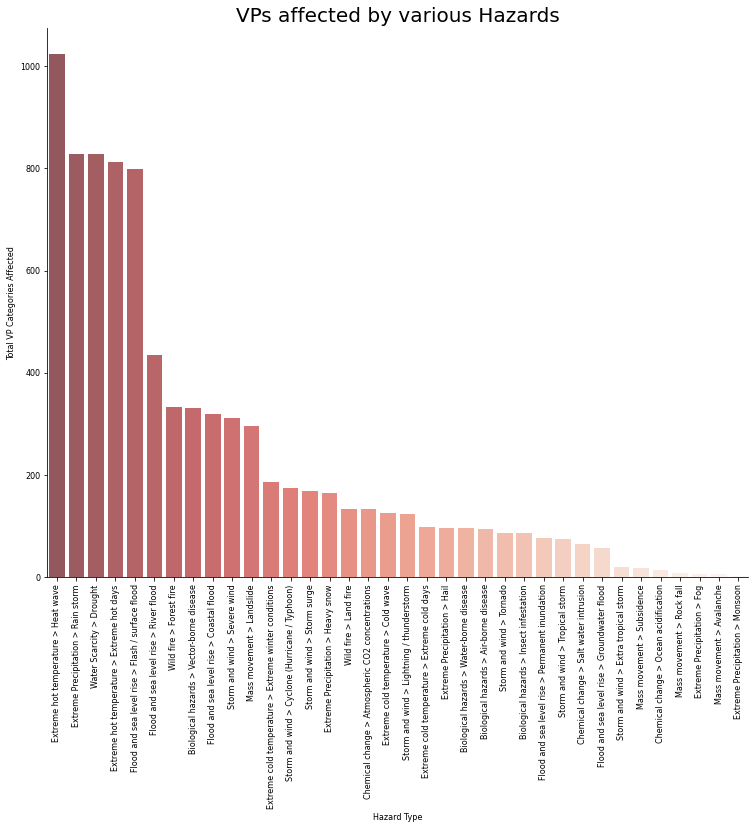

In [108]:
#plot a bar chart

vulnerable_population_per_hazards_grouped_df=vulnerable_population_per_hazards_df.groupby(["Hazard Type"])["Total VP Categories Affected"].sum().sort_values(ascending=False).reset_index().copy()
plt.figure(figsize=(11.7, 8.27))
mat.rcParams['font.size'] = 8
sns.catplot(x="Hazard Type", y="Total VP Categories Affected", data=vulnerable_population_per_hazards_grouped_df, 
            estimator=sum, ci=None, kind="bar", palette="Reds_r", alpha=0.7, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation = 90)
plt.title('VPs affected by various Hazards',size=20);
plt.show()


The above bar chart shows us the total VP categories affected by each hazard across all the countries. 

Countries should prioritize the hazards that affect the greater population. From our analysis above we can see that heat waves, rain storms, droughts, extreme hot days, and flash floods are the top 5 hazard types that impacted the most vulnerable populations in 2020.

Another interesting point to note is that all of the top 3 hazards which affect the vulnerable populations the most are also the most common hazards faced by most countries.


### 2.3 (2)

In [137]:
vul_pop=vulnerable_population_per_hazards_df.iloc[:, 8:-1].sum().sort_values(ascending=True).reset_index()
vul_pop.rename(columns={'index': 'Vulnerable Population', 0: 'Number of VPs affected'}, inplace=True)
vul_pop

,Vulnerable Population,Number of VPs affected
0,Indigenous population,237
1,Unemployed persons,369
2,Other,381
3,Women & girls,382
4,Marginalized groups,738
5,Persons with chronic diseases,804
6,Persons with disabilities,809
7,Persons living in sub-standard housing,1186
8,Low-income households,1292
9,Elderly,1316


In [138]:
import plotly.express as px
map=['#680409','#680409','#b20710','#eb0915','#f73842','#f84854','#f97077','#f97077','#fb969b','#fcbcbf','#fee1e3']

figure = px.pie(vul_pop, 
             values=vul_pop['Number of VPs affected'],
             names=vul_pop['Vulnerable Population'],
             color_discrete_map = "Reds_r",
             hole = 0.3, 
            hover_data=['Vulnerable Population'],
             color_discrete_sequence= px.colors.sequential.Reds_r,
             title="Percentages of each Vulnerable Populations Affected by Hazards (2020)")

figure.update_layout(title_x=0.5)
figure.show()

px.colors.qualitative

<module '_plotly_utils.colors.qualitative' from '/usr/local/lib/python3.8/dist-packages/_plotly_utils/colors/qualitative.py'>

In [116]:
heat_wave = hazards_df.loc[hazards_df["Hazard Type"] == "Extreme hot temperature > Heat wave"].iloc[:, 8:19].sum().sort_values(ascending=False).reset_index()
heat_wave = heat_wave.drop(heat_wave["index"].loc[heat_wave["index"]=='Total VP Categories Affected'].index)
heat_wave.rename(columns={'index': 'Vulnerable Population', 0: 'Number of VPs affected'}, inplace=True)
heat_wave

,Vulnerable Population,Number of VPs affected
1,Elderly,196
2,Persons with chronic diseases,142
3,Low-income households,131
4,Persons living in sub-standard housing,131
5,Persons with disabilities,94
6,Marginalized groups,69
7,Unemployed persons,40
8,Other,37
9,Women & girls,30
10,Indigenous population,18


In [130]:
figure1 = px.pie(heat_wave, 
             values=heat_wave['Number of VPs affected'],
             names=heat_wave['Vulnerable Population'],
             color_discrete_map = "Reds_r",
             hole = 0.3, 
             hover_data=['Vulnerable Population'],
             color_discrete_sequence= px.colors.sequential.Reds_r,
             
             title="Percentages of each Vulnerable Populations Affected by Heat Waves (2020)")

figure1.update_layout(title_x=0.5)
figure1.show()

### **2.4 Factors Affecting the adaptability of Vulnerable Populations to Climate Hazards**

In [46]:
#finding the major factors challenging most countries by using group by and aggregate
country_adaptability_challenging_factors=country_adaptability_challenging_factors.groupby('Factor Challenging')['Countries'].agg('count').sort_values(ascending=False).reset_index()

country_adaptability_challenging_factors=country_adaptability_challenging_factors.head(10)

country_adaptability_challenging_factors

,Factor Challenging,Countries
0,Budgetary capacity,164
1,Housing,110
2,Poverty,102
3,Infrastructure conditions / maintenance,96
4,Rapid urbanization,83
5,Inequality,82
6,Environmental conditions,78
7,Cost of living,76
8,Government capacity,72
9,Resource availability,68


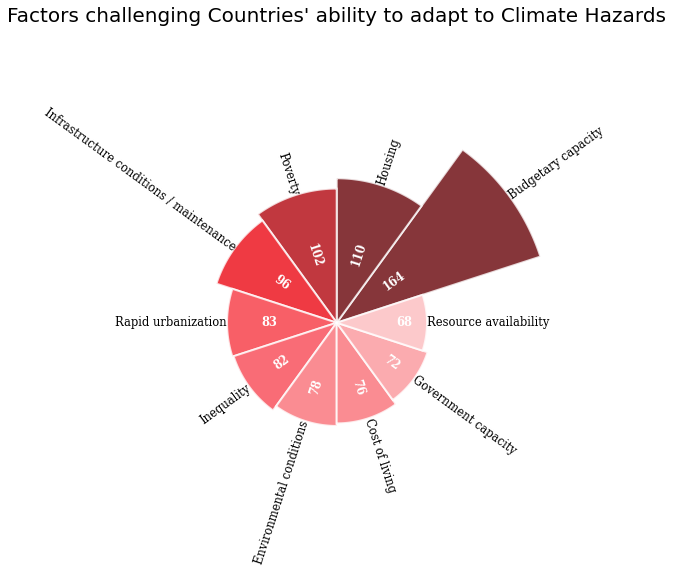

In [47]:
color_map = ['#680409','#680409','#b20710','#eb0915','#f73842','#f84854','#f97077','#f97077','#fb969b','#fcbcbf','#fee1e3']

# initialize the figure
plt.figure(figsize=(11.7, 8.27))
ax = plt.subplot(111, polar=True)
ax.set_title("Factors challenging Countries' ability to adapt to Climate Hazards", y=1.2, pad=-14,size=20)
plt.axis('off')

# Constants = parameters controlling the plot layout
upperLimit = 16
lowerLimit = 1
#labelPadding = 30

# Compute max and min in the dataset
max = country_adaptability_challenging_factors['Countries'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (1)
# The maximum will be converted to the upperLimit (16)
slope = (max - lowerLimit) / max
heights = slope * country_adaptability_challenging_factors['Countries'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(country_adaptability_challenging_factors.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(country_adaptability_challenging_factors.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit, linewidth=2, edgecolor="white", color=color_map,alpha=0.8)

# Add labels
for bar, angle, height, label,label2 in zip(bars,angles, heights, country_adaptability_challenging_factors["Factor Challenging"], 
                                            country_adaptability_challenging_factors["Countries"]):

    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(x=angle, y=lowerLimit+ bar.get_height(), s=label, ha=alignment, fontsize=10,fontfamily='serif',
        va='center', rotation=rotation, rotation_mode="anchor", size='x-large')
    
    ax.text(x=angle, y=lowerLimit+45, s=label2, ha=alignment, fontsize=10,fontfamily='serif', color='white',fontweight='bold',
        va='center',  rotation=rotation, rotation_mode="anchor", size='x-large')

The above visualization is a circular bar graph.The bigger the bar gets (or darker the colour) the higher the effect.

From this graph we can see that budgetary capacities and housing plans are some of the major factors challenging countries to adapt to the previously seen climate hazards. For the final deliverable we'll analyze which factors are helping them better adapt and suggest which measures they can take up.

<Figure size 2930.4x2899.44 with 0 Axes>

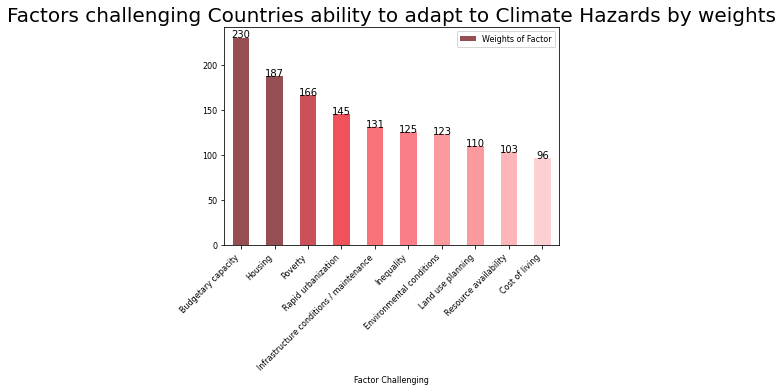

In [48]:
color_map = ['#680409','#680409','#b20710','#eb0915','#f73842','#f84854','#f97077','#f97077','#fb969b','#fcbcbf','#fee1e3']
plt.figure(figsize=(40.7, 40.27))
mat.rcParams['font.size'] = 8
plot=top_10_factors_challenging_weights.plot.bar(y ="Weights of Factor", alpha=0.7, color=color_map )
#.set_xticklabels(rotation=90) 
plt.xticks(rotation = 45,ha='right')
plt.title('Factors challenging Countries ability to adapt to Climate Hazards by weights',size=20);

for p in plot.patches:
      height = p.get_height()
      plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
plt.show()

In [49]:
country_adaptability_supports_factors=country_adaptability_supports_factors.groupby('Factor Supporting')['Countries'].agg('count').sort_values(ascending=False).reset_index()

country_adaptability_supports_factors=country_adaptability_supports_factors.head(10)

country_adaptability_supports_factors

,Factor Supporting,Countries
0,Community engagement,111
1,Land use planning,83
2,Government capacity,67
3,Political engagement / transparency,67
4,Access to education,65
5,Political stability,60
6,Access to basic services,52
7,Access to quality / relevant data,52
8,Access to healthcare,50
9,Infrastructure capacity,40


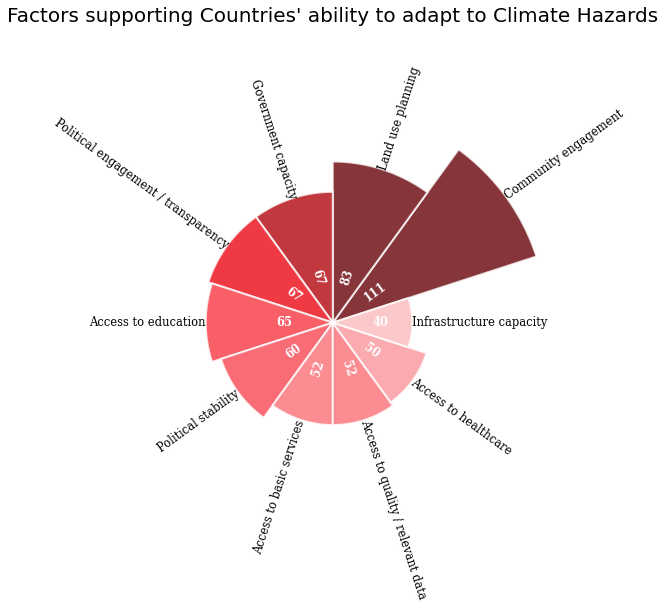

In [50]:
color_map = ['#680409','#680409','#b20710','#eb0915','#f73842','#f84854','#f97077','#f97077','#fb969b','#fcbcbf','#fee1e3']

# initialize the figure
plt.figure(figsize=(11.7, 8.27))
ax = plt.subplot(111, polar=True)
ax.set_title("Factors supporting Countries' ability to adapt to Climate Hazards", y=1.2, pad=-14,size=20)
plt.axis('off')

# Constants = parameters controlling the plot layout
upperLimit = 16
lowerLimit = 1
#labelPadding = 30

# Compute max and min in the dataset
max = country_adaptability_supports_factors['Countries'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (1)
# The maximum will be converted to the upperLimit (16)
slope = (max - lowerLimit) / max
heights = slope * country_adaptability_supports_factors['Countries'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(country_adaptability_supports_factors.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(country_adaptability_supports_factors.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit, linewidth=2, edgecolor="white", color=color_map,alpha=0.8)

# Add labels
for bar, angle, height, label,label2 in zip(bars,angles, heights, country_adaptability_supports_factors["Factor Supporting"], 
                                            country_adaptability_supports_factors["Countries"]):

    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(x=angle, y=lowerLimit+ bar.get_height(), s=label, ha=alignment, fontsize=10,fontfamily='serif',
        va='center', rotation=rotation, rotation_mode="anchor", size='x-large')
    
    ax.text(x=angle, y=lowerLimit+20, s=label2, ha=alignment, fontsize=10,fontfamily='serif', color='white',fontweight='bold',
        va='center',  rotation=rotation, rotation_mode="anchor", size='x-large')

<Figure size 2930.4x2899.44 with 0 Axes>

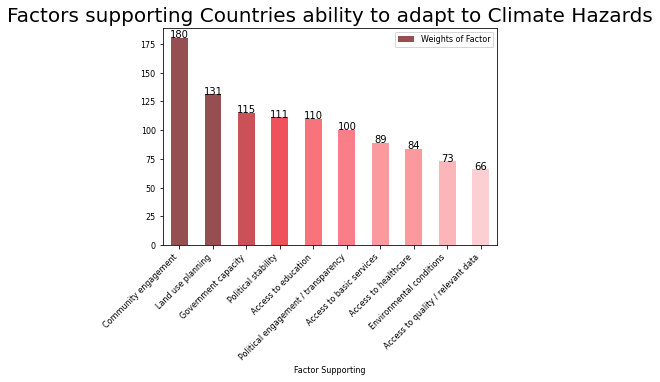

In [51]:
color_map = ['#680409','#680409','#b20710','#eb0915','#f73842','#f84854','#f97077','#f97077','#fb969b','#fcbcbf','#fee1e3']
plt.figure(figsize=(40.7, 40.27))
mat.rcParams['font.size'] = 8
plot=top_10_factors_supporting_weights.plot.bar(y ="Weights of Factor", alpha=0.7, color=color_map )
#g.set_xticklabels(rotation=90) 
#plt.xticks(rotation = 90)

plt.xticks(rotation = 45,ha='right')
plt.title('Factors supporting Countries ability to adapt to Climate Hazards',size=20);

for p in plot.patches:
      height = p.get_height()
      plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
plt.show()

# color_map = ['#680409','#680409','#b20710','#eb0915','#f73842','#f84854','#f97077','#f97077','#fb969b','#fcbcbf','#fee1e3']
# plt.figure(figsize=(40.7, 40.27))
# plot=top_10_factors_supporting_weights.plot.bar(y ="Weights of Factor", alpha=0.7, color=color_map )
# #.set_xticklabels(rotation=90) 
# plt.xticks(rotation = 45,ha='right')
# plt.title('Factors affecting vulnerable populations by weights',size=20);

# for p in plot.patches:
#       height = p.get_height()
#       plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
# plt.show()

#### **2.5 Sectors that contribute the most to CO2 emissions**

In [52]:
#get rid of total emissions as it's mis directing
top_sectors_emissions = top_sectors_emissions[top_sectors_emissions['Row Name'].str.contains('Total')==False]

#cleaning the column names
top_sectors_emissions.rename(columns={'Row Name': 'Sector', 'Response Answer': 'Emissions(metric tonnes)'}, inplace=True)
top_sectors_emissions.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Sector,Emissions(metric tonnes)
1,Transportation > On-road,6.814705e+08
4,Stationary energy > Industrial buildings & fac...,1.970945e+08
6,Stationary energy > Residential buildings,1.227297e+08
8,Stationary energy > Commercial buildings & fac...,1.018252e+08
9,Generation of grid-supplied energy > Electrici...,9.407945e+07
10,IPPU > Industrial process,9.133403e+07
12,Waste > Solid waste disposal,3.053911e+07
13,Transportation > Aviation,1.722174e+07
14,Stationary energy > Institutional buildings & ...,1.290017e+07
16,AFOLU > Livestock,1.108023e+07


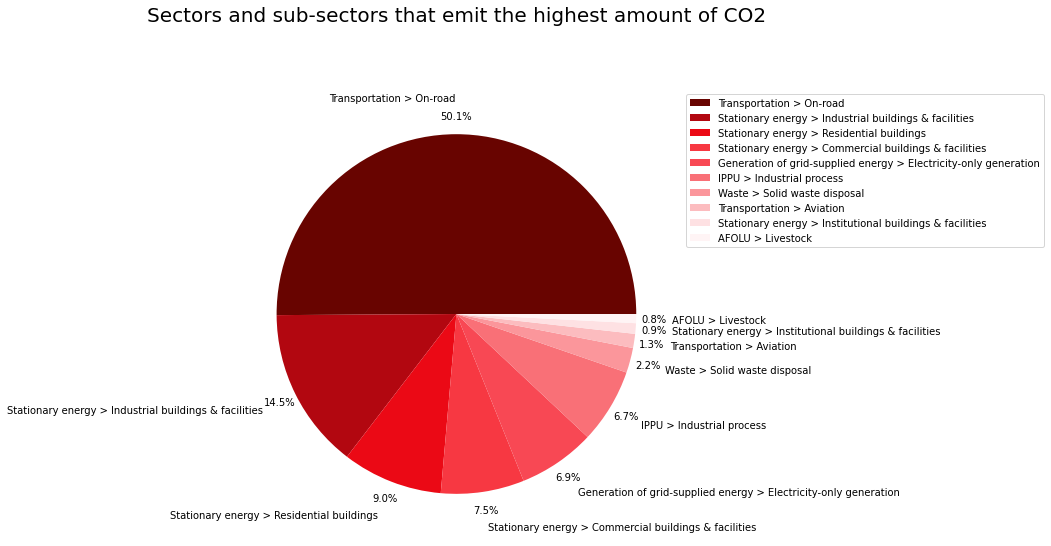

In [53]:
#plotting a pie chart
colors=['#680400','#b20710','#eb0915','#f73842','#f84854','#f97077','#fb969b','#fcbcbf','#fee1e3','#fff4f5']
plot = top_sectors_emissions.head(10).plot.pie(y='Emissions(metric tonnes)',labels=(top_sectors_emissions['Sector']), labeldistance=1.2,
                                               figsize=(11.7, 8.27), autopct='%1.1f%%', pctdistance=1.1, textprops={'fontsize': 10}, colors=colors);
plot.legend(loc=2, prop={'size': 10},bbox_to_anchor=(1,1));
plt.ylabel("") 
plt.title("Sectors and sub-sectors that emit the highest amount of CO2", size=20, pad=68);

From the pie chart above we can observe the 10 top sectors and sub-sectors that emit the highest amount of CO2 in the cities in our dataset. It's interesting to observe that on-road transportation is responsible for about 50% of total emissions caused by the top 10 sectors. This is followed by stationary energy in industrial buildings, residential buildings, and commercial buildings. Understanding that most polluting sectors can help cities understand where they should focus most of their efforts to cut CO2 emissions (i.e. increasing emission taxes or the amount of renewable energy destined to these specific sectors).

For future scope we will look into the relationship between emissions and climate hazards if any. We will also look into the country-wide emissions and find out what the most polluted countries are.

### **2.6 CDP Region wise CO2 emissions**

In [54]:
top_regions=top_regions.groupby("CDP Region").agg({'Latitude': 'first', 'Longitude': 'first','Response Answer':'sum'}).sort_values(by="Response Answer",ascending=False).reset_index()
top_regions



# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(top_regions)):
        lat = top_regions.iloc[i]['Latitude']
        long = top_regions.iloc[i]['Longitude']
        radius=5
        popup_text = """CDP Region : {}<br>
                    CO2 Total Emissions : {}<br>"""
        popup_text = popup_text.format(top_regions.iloc[i]['CDP Region'],
                                   top_regions.iloc[i]['Response Answer']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius,color="red",fill_color="red", popup= popup_text).add_to(marker_cluster)
#show the map
world_map

### **2.7 Countries that contribute the most to CO2 emissions**

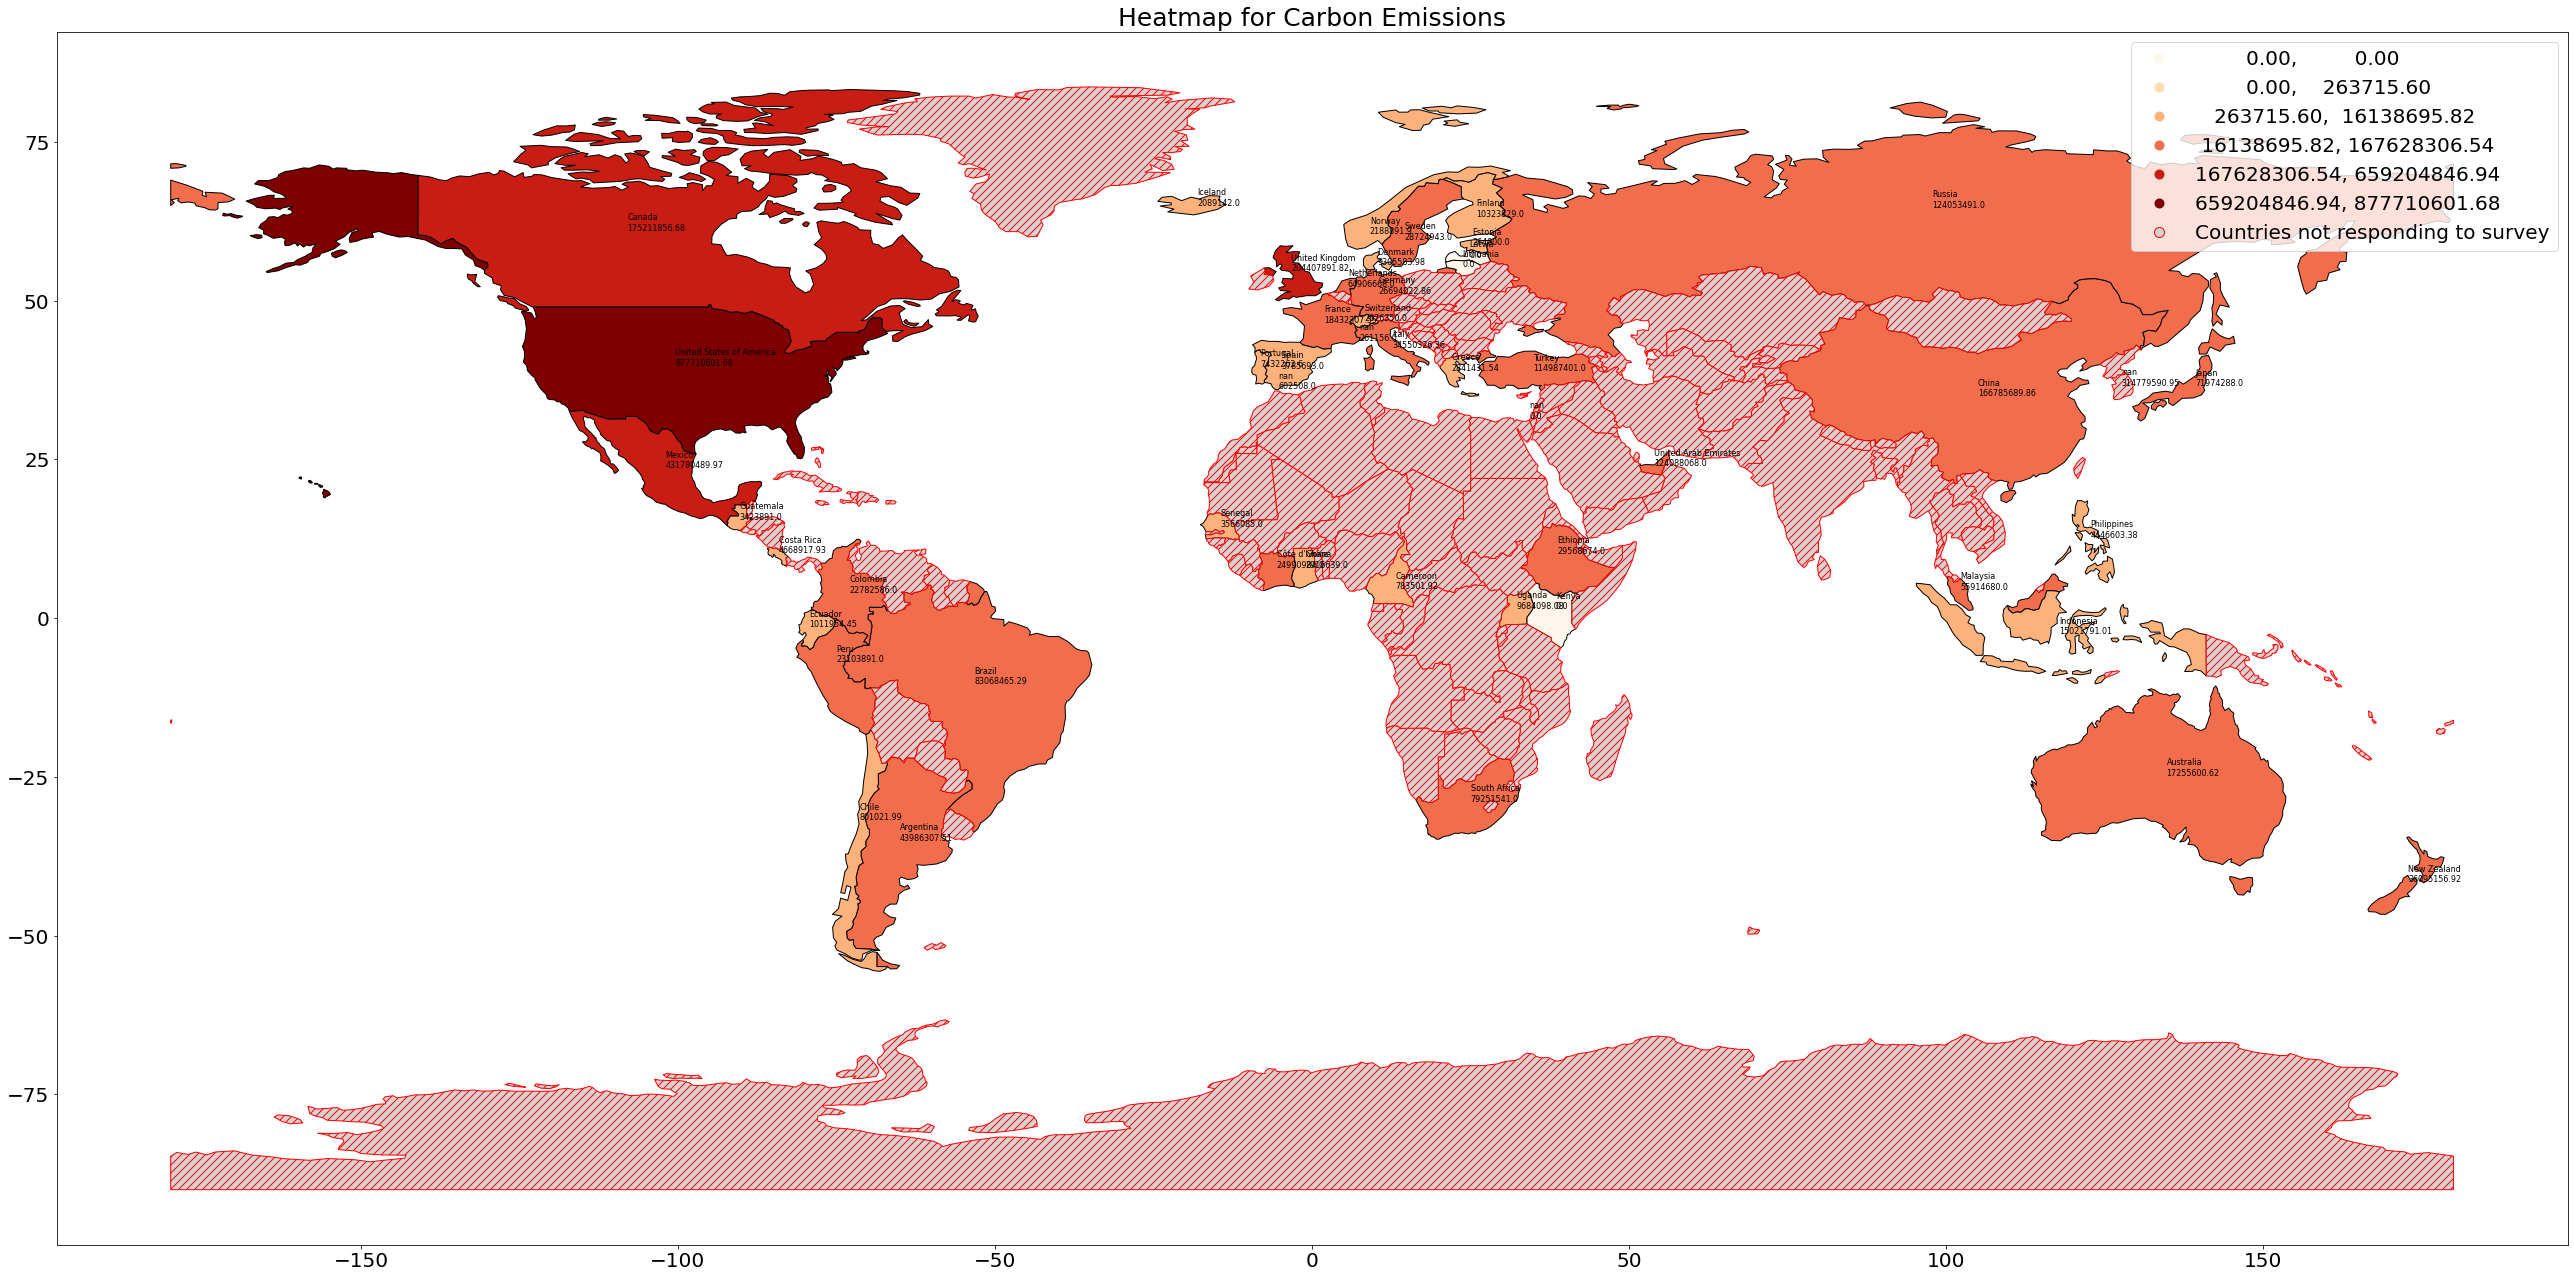

In [55]:

#getting a basemap for polygon geometry in order to plot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
plot_countries=pd.merge(top_countries,world,on='CODE',how="outer")

mat.rcParams['font.size'] = 20
plot_countries.plot(column='Response Answer', scheme="percentiles",
           figsize=(45, 40),
           legend=True,cmap='OrRd',edgecolor='black',  missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Countries not responding to survey",
    });


    
# plot_countries.explore(
#     column="Response Answer", # make choropleth based on "BoroName" column
#     tooltip="Response Answer", # show "BoroName" value in tooltip (on hover)
#     popup=True, # show all values in popup (on click)
#     tiles="CartoDB positron", # use "CartoDB positron" tiles
#     cmap='OrRd', # use "Set1" matplotlib colormap
#     style_kwds=dict(color="black"),
#     missing_kwds={
#        "color": "lightgrey",
#        "edgecolor": "red",
#        "hatch": "///",
#         "label": "Countries not responding to survey",
        
#    },scheme="percentiles",legend=True # use black outline
#     )



# #cx.add_basemap(ax,crs=df.crs, source=cx.providers.Stamen.TonerLite)
plt.title('Heatmap for Carbon Emissions',fontsize=25)
# # add countries names and numbers 
for i in range(0,len(plot_countries['Country'])):
  plt.text(float(plot_countries.Longitude[i]),float(plot_countries.Latitude[i]),"{}\n{}".format(plot_countries.name[i],plot_countries['Response Answer'][i]),size=8);
plt.show()


#Please ignore the warnings and scroll below
#Lot of warmings are there because data is missing as lot of countries havent responded to CDP Survey

## **2.8 Actions taken by cities to counter Hazards**

In [62]:
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.io import output_notebook
import seaborn as sns
from bokeh.palettes import RdBu8
from bokeh.transform import linear_cmap
from bokeh.palettes import Category10_5
from bokeh.models import BoxAnnotation

In [56]:
Line_chart = actions_df.groupby('Action Type')['Total Co-Benefit area'].sum().reset_index()
Line_chart2=Line_chart.sort_values(by='Total Co-Benefit area',ascending= False).reset_index().iloc[0:10]
Line_chart2 = Line_chart2.drop('index', axis=1)
#Line_chart2 = Line_chart2.drop(Line_chart2["Action Type"].loc[Line_chart2["Action Type"]=='Other'].index)
Line_chart2.head()



,Action Type,Total Co-Benefit area
0,Tree planting and/or creation of green space,961
1,Flood mapping,832
2,Other,813
3,Community engagement/education,725
4,Incorporating climate change into long-term pl...,674


In [66]:
TOOLTIPS = []

the_sizes = Line_chart2["Total Co-Benefit area"] / 3500
fig = figure( x_range = Line_chart2['Action Type'], x_axis_label = 'Action',  y_axis_label="Frequency of Action", title="Most common types of Actions", width = 1200, height = 1000,tooltips = TOOLTIPS)

fig.circle(x= Line_chart2["Action Type"], y= Line_chart2["Total Co-Benefit area"],  legend_label="Action" , size = 19, fill_alpha = 0.7, fill_color = 'purple', radius = the_sizes )
fig.title.text_font_size = "25px"
fig.title.align = "center"
fig.xaxis.major_label_orientation = 45


low_box = BoxAnnotation(top = 500, fill_color = 'orange', fill_alpha = 0.2)
mid_box = BoxAnnotation(bottom = 500, top = 770, fill_color = 'yellow', fill_alpha = 0.2)
top_box = BoxAnnotation(bottom = 770, top = 1000, fill_color = 'green', fill_alpha = 0.2)

fig.add_layout(low_box)
fig.add_layout(mid_box)
fig.add_layout(top_box)
fig.title.align = 'center'

show(fig)

output_notebook()

In [60]:
action_taken = actions_df.groupby("Hazard Type")["Action Number"].count().sort_values(ascending= False).reset_index().head(10)
action_taken

,Hazard Type,Action Number
0,Extreme Precipitation > Rain storm,377
1,Extreme hot temperature > Heat wave,325
2,Flood and sea level rise > Flash / surface flood,285
3,Water Scarcity > Drought,279
4,Extreme hot temperature > Extreme hot days,251
5,Flood and sea level rise > River flood,168
6,Flood and sea level rise > Coastal flood,158
7,Wild fire > Forest fire,95
8,Mass movement > Landslide,69
9,Storm and wind > Cyclone (Hurricane / Typhoon),62


In [65]:
TOOLTIPS = []

fig = figure( x_range = action_taken['Hazard Type'], x_axis_label = 'Hazard',  y_axis_label="No of Actions", title="No of Actions Taken per Hazard", tooltips = TOOLTIPS, width = 800, height = 700,
            )

fig.triangle(x= action_taken["Hazard Type"], y= action_taken["Action Number"],  legend_label="Actions Taken" , size = 30, fill_alpha = 0.7, fill_color = 'Green' )
fig.title.text_font_size = "25px"
fig.title.align = "center"
fig.xaxis.major_label_orientation = 45

low_box = BoxAnnotation(top = 120, fill_color = 'blue', fill_alpha = 0.2)
mid_box = BoxAnnotation(bottom = 120, top = 200, fill_color = 'yellow', fill_alpha = 0.2)
top_box = BoxAnnotation(bottom = 200, top = 400, fill_color = 'pink', fill_alpha = 0.2)

fig.add_layout(low_box)
fig.add_layout(mid_box)
fig.add_layout(top_box)
fig.title.align = 'center'

show(fig)

output_notebook()

##**Conclusion**

We started out this project by looking at cities which responded to CDP survey in 2019. There were 566 of them. Then we went on to look at the most common hazards which cities were faced with. Extreme Precipitation and Water scarcity were among the top hazards and affected the maximum number of vulnerable populations. Elderly and low-income households are among the vulnerable populations which were severely affected by climate hazards. 


After looking at hazards and vulnerable populations we wanted to dive into the factors which support and challenge the cities’ ability to adapt to hazards. Budgetary capacity i.e. the economy of the country challenges the adaptation ability the most. On the other hand community engagement supports the adaptability the most. We wanted to draw out one of the major and much talked about predicaments i.e. Carbon emissions in an effort to correlate it with the climate hazards which countries face. We saw that Transportation causes the maximum amount of CO2 emissions all over the world while USA is contributing the most to it according to this data. It should be noted that since very few cities responded to this part of survey we won’t be making this conclusion out rightly. 

Cities have been reporting several actions to mitigate the risks of hazards and the inherent danger which the vulnerable populations face. We saw several of these actions taken by cities. It’s interesting to note that the hazards which are most prevalent have the most number of actions taken by cities to mitigate them. We found another interesting observation wherein ‘Others’ is one of the most reported action. This perhaps indicates that a lot of cities must be developing novel and innovative solutions to tackle climate hazards and these do not fit into the conventional categories.

 Few of the recommendations we have for CDP are to incorporate more cities from Asia, Africa, and the Middle East as geographical analysis will continue to suffer until we have more representation from these areas. Other than that going green seems to be the most effective way to tackle climate hazards.

*Note - Specific observations/conclusions from the visualizations are mentioned below the respective visualizations.*

##**References**


1. https://data.cdp.net/Governance/2020-Full-Cities-Dataset/eja6-zden

2. https://data.cdp.net/Governance/2020-Cities-Disclosing-to-CDP/xxem-fkx3

3. https://www.kaggle.com/datasets/shabou/cdp-city-location-dataset

4. https://geopandas.org/en/stable/docs.html

5. https://www.python-graph-gallery.com/circular-barplot-basic

6. https://guidance.cdp.net/en/guidance?cid=16&ctype=theme&idtype=ThemeID&incchild=1&microsite=0&otype=Questionnaire&tags=TAG-637%2CTAG-570%2CTAG-13013
